In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.ticker import PercentFormatter
NTS_dummy = pd.read_csv('/content/drive/MyDrive/socio_pred/UKDA-5340-tab/NTS_dummy.csv')

In [3]:
NTS_dummy.head()

,IndividualID,Total Number of Trips,SurveyYear,Age_B04ID_4,Age_B04ID_5,Age_B04ID_6,Age_B04ID_7,Age_B04ID_8,Age_B04ID_9,Sex_B01ID_1,...,std_Distance_wk,std_Distance_ex_wk,std_time_short_wk,std_time_mid_wk,std_time_long_wk,std_travel_short_wk,std_travel_mid_wk,std_travel_long_wk,std_max_speed_wk,std_min_speed_wk
0,2019011363,16,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.452267,0.452267,0.000000,0.452267,0.452267,0.000000,4.748804,1.809068
1,2019011428,18,2019.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.375534,0.375534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.946959,1.011156
2,2019011564,23,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5.543389,5.543389,0.500000,0.516398,0.341565,0.500000,0.516398,0.341565,10.389270,2.381934
3,2019011569,15,2019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12.806946,12.806946,0.497245,0.000000,0.497245,0.497245,0.267261,0.513553,27.412657,4.821794
4,2019011570,13,2019.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,35.543401,35.543401,0.492366,0.389249,0.522233,0.492366,0.389249,0.522233,25.349410,9.194265


In [4]:
mobility = pd.concat([NTS_dummy.iloc[:,102:],NTS_dummy.iloc[:,1:2]],axis=1)
socio = NTS_dummy.iloc[:,3:102]

In [13]:
socio.iloc[:,84:97]

,PSUStatsReg_B01ID_1,PSUStatsReg_B01ID_2,PSUStatsReg_B01ID_3,PSUStatsReg_B01ID_4,PSUStatsReg_B01ID_5,PSUStatsReg_B01ID_6,PSUStatsReg_B01ID_7,PSUStatsReg_B01ID_8,PSUStatsReg_B01ID_9,PSUStatsReg_B01ID_10,PSUStatsReg_B01ID_11,PSUStatsReg_B01ID_12,PSUStatsReg_B01ID_13
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Merge Sociodemographic Columns 

In [14]:

# Sociodemographic columns:
socio_cols = {'age' : socio.columns[0:6],
'sex' : socio.columns[6:8],
'marital' : socio.columns[8:13],
'ethincity': socio.columns[13:15],
'caraccess': socio.columns[15:19],
'license': socio.columns[19:20],
'income': socio.columns[20:23],
'work': socio.columns[23:29],
'socialclass': socio.columns[29:36],
'hhincome': socio.columns[45:48],
'tenancy': socio.columns[48:51],
'hh_struc': socio.columns[51:57],
'hh_work': socio.columns[57:61],
'hh_emp': socio.columns[61:65],
'hh_socialclass': socio.columns[65:71],
'urban_rural': socio.columns[82:84],
'car': socio.columns[97:99],
'region': socio.columns[84:97]}

In [15]:
#age: under 21 is a small proportion
socio[socio_cols['age']].sum()

Age_B04ID_4     41.0
Age_B04ID_5    221.0
Age_B04ID_6    421.0
Age_B04ID_7    416.0
Age_B04ID_8    514.0
Age_B04ID_9    832.0
dtype: float64

In [16]:
# Merge marital: married vs. not married(single/divorced/seperated,etc):
socio['married'] = socio[socio_cols['marital'][0]]
socio['not_married'] = socio[socio_cols['marital'][1:5]].sum(axis=1)


In [17]:
#ethnicity is imbalanced
socio[socio_cols['ethincity']].sum()

EthGroupTS_B02ID_1    2278.0
EthGroupTS_B02ID_2     167.0
dtype: float64

In [18]:
#Most people have car acess, and are main drivier
socio[socio_cols['caraccess']].sum()


CarAccess_B01ID_1      79.0
CarAccess_B01ID_2    2052.0
CarAccess_B01ID_3     313.0
CarAccess_B01ID_5       1.0
dtype: float64

In [19]:
#Every one has license
socio[socio_cols['license']].sum()

DrivLic_B02ID_1    2445.0
dtype: float64

In [20]:
#Mostly from lower income 
socio[socio_cols['income']].sum()

IndIncome2002_B02ID_1    1392.0
IndIncome2002_B02ID_2     744.0
IndIncome2002_B02ID_3     309.0
dtype: float64

In [21]:
#Unemployed and students are rare. Mostly either fulltime or retired/disabled
socio[socio_cols['work']].sum()

EcoStat_B02ID_1    1325.0
EcoStat_B02ID_2     367.0
EcoStat_B02ID_3      12.0
EcoStat_B02ID_4     646.0
EcoStat_B02ID_5      10.0
EcoStat_B02ID_6      85.0
dtype: float64

In [22]:
# Merge work: employed/parttime/notworking
socio['fulltime'] = socio[socio_cols['work'][0]]
socio['parttime'] = socio[socio_cols['work'][1]]
socio['not_working'] = socio[socio_cols['work'][2:6]].sum(axis=1)


In [23]:
#Mostly professoonal/technical
socio[socio_cols['socialclass']].sum()

SC_B01ID_1     183.0
SC_B01ID_2    1016.0
SC_B01ID_3     482.0
SC_B01ID_4     416.0
SC_B01ID_5     298.0
SC_B01ID_6      45.0
SC_B01ID_7       5.0
dtype: float64

In [24]:
#Unlike individual income, mostly from higher income hh
socio[socio_cols['hhincome']].sum()

HHIncome2002_B02ID_1     568.0
HHIncome2002_B02ID_2     720.0
HHIncome2002_B02ID_3    1157.0
dtype: float64

In [25]:
#Imbalanced, mostly owners
socio[socio_cols['tenancy']].sum()

Ten1_B02ID_1    2026.0
Ten1_B02ID_2     413.0
Ten1_B02ID_3       6.0
dtype: float64

In [26]:
#not many single parents
socio[socio_cols['hh_struc']].sum()

HHoldStruct_B02ID_1    281.0
HHoldStruct_B02ID_2    982.0
HHoldStruct_B02ID_3    405.0
HHoldStruct_B02ID_4     45.0
HHoldStruct_B02ID_5    539.0
HHoldStruct_B02ID_6    193.0
dtype: float64

In [27]:
#fairly distributed, not many from unemployed hh
socio[socio_cols['hh_work']].sum()

HRPWorkStat_B02ID_1    1365.0
HRPWorkStat_B02ID_2     311.0
HRPWorkStat_B02ID_3     673.0
HRPWorkStat_B02ID_4      96.0
dtype: float64

In [28]:
# Merge hh work: employed/parttime/notworking
socio['hh_fulltime'] = socio[socio_cols['hh_work'][0]]
socio['hh_parttime'] = socio[socio_cols['hh_work'][1]]
socio['hh_not_working'] = socio[socio_cols['hh_work'][2:4]].sum(axis=1)


In [29]:
#mostly in other category
socio[socio_cols['hh_emp']].sum()

HRPEmpStat_B01ID_1     380.0
HRPEmpStat_B01ID_2     265.0
HRPEmpStat_B01ID_3    1784.0
HRPEmpStat_B01ID_4      16.0
dtype: float64

In [30]:
#mostly in other category
socio[socio_cols['hh_socialclass']].sum()

HRPSEGWorkStat_B01ID_1    471.0
HRPSEGWorkStat_B01ID_2    663.0
HRPSEGWorkStat_B01ID_3    367.0
HRPSEGWorkStat_B01ID_4    192.0
HRPSEGWorkStat_B01ID_5    673.0
HRPSEGWorkStat_B01ID_6     79.0
dtype: float64

In [31]:
#mostly urban
socio[socio_cols['urban_rural']].sum()

Settlement2011EW_B03ID_1    1814.0
Settlement2011EW_B03ID_2     631.0
dtype: float64

In [34]:
socio[socio_cols['region']].sum()
# 1	Northern, Metropolitan
# 2	Northern, Non-metropolitan
# 3	Yorkshire / Humberside, Metropolitan
# 4	Yorkshire / Humberside, Non-metropolitan
# 5	East Midlands
# 6	East Anglia
# 7	South East (excluding London Boroughs)
# 8	London Boroughs
# 9	South West
# 10	West Midlands, Metropolitan
# 11	West Midlands, Non-metropolitan
# 12	North West, Metropolitan
# 13	North West, Non-metropolitan

PSUStatsReg_B01ID_1      36.0
PSUStatsReg_B01ID_2     100.0
PSUStatsReg_B01ID_3     164.0
PSUStatsReg_B01ID_4      89.0
PSUStatsReg_B01ID_5     214.0
PSUStatsReg_B01ID_6     116.0
PSUStatsReg_B01ID_7     623.0
PSUStatsReg_B01ID_8     219.0
PSUStatsReg_B01ID_9     275.0
PSUStatsReg_B01ID_10     91.0
PSUStatsReg_B01ID_11    195.0
PSUStatsReg_B01ID_12    188.0
PSUStatsReg_B01ID_13    135.0
dtype: float64

In [39]:
socio.columns[84:97]

Index(['PSUStatsReg_B01ID_1', 'PSUStatsReg_B01ID_2', 'PSUStatsReg_B01ID_3',
       'PSUStatsReg_B01ID_4', 'PSUStatsReg_B01ID_5', 'PSUStatsReg_B01ID_6',
       'PSUStatsReg_B01ID_7', 'PSUStatsReg_B01ID_8', 'PSUStatsReg_B01ID_9',
       'PSUStatsReg_B01ID_10', 'PSUStatsReg_B01ID_11', 'PSUStatsReg_B01ID_12',
       'PSUStatsReg_B01ID_13'],
      dtype='object')

In [ ]:
#almost every one has vehcile available to them
socio[socio_cols['car']].sum()

VehAvail_B01ID_1    2432.0
VehAvail_B01ID_2      13.0
dtype: float64

In [40]:
# vars to keep 
socio_cols_2 = {'age' : socio.columns[0:6],
'sex' : socio.columns[6:8],
'marital' : socio.columns[99:101],
'income': socio.columns[20:23],
'work': socio.columns[101:104],
'hhincome': socio.columns[45:48],
'hh_struc': socio.columns[51:57],
'hh_work': socio.columns[104:107],
'hh_socialclass': socio.columns[65:71],
'urban_rural': socio.columns[82:84],
'region': socio.columns[84:97]}
socio_2 = pd.DataFrame()
for k in socio_cols_2.keys():
  socio_2[socio_cols_2[k]]= socio[socio_cols_2[k]]
tmp = pd.concat([NTS_dummy[['IndividualID','SurveyYear']],socio_2],axis=1)
nts_v2 = pd.concat([tmp,mobility],axis=1)

#save file
nts_v2.to_csv('/content/drive/MyDrive/socio_pred/UKDA-5340-tab/NTS_v2.csv',\
                 index=False)

Analyze mobility features

In [ ]:
mobility.head()

,Count_Weekday_Trips,Count_start_night,Count_start_evening,Count_start_afternoon,Count_start_morning,Count_end_night,Count_end_evening,Count_end_afternoon,Count_end_morning,Total_Distance,...,std_end_morning_wk,std_Distance_wk,std_Distance_ex_wk,std_time_short_wk,std_time_mid_wk,std_time_long_wk,std_travel_short_wk,std_travel_mid_wk,std_travel_long_wk,Total Number of Trips
0,12,0,6,2,8,0,6,2,8,40.0,...,0.522233,0.000000,0.000000,0.452267,0.452267,0.000000,0.452267,0.452267,0.000000,16
1,13,0,0,11,7,0,1,11,6,35.0,...,0.506370,0.375534,0.375534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18
2,16,4,4,8,7,4,4,9,6,240.0,...,0.447214,5.543389,5.543389,0.500000,0.516398,0.341565,0.500000,0.516398,0.341565,23
3,14,2,4,5,4,2,9,0,4,292.5,...,0.468807,12.806946,12.806946,0.497245,0.000000,0.497245,0.497245,0.267261,0.513553,15
4,12,1,5,0,7,1,5,0,7,520.0,...,0.514929,35.543401,35.543401,0.492366,0.389249,0.522233,0.492366,0.389249,0.522233,13


# General stats of the sample

In [44]:
#population
pop = mobility.shape[0]
print('Number of Individuals: ', pop)

Number of Individuals:  2445


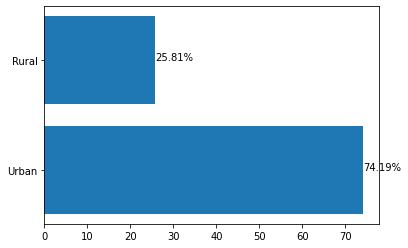

In [45]:
#Urban vs Rural
x = ["Urban", "Rural"]
y = round(socio[socio.columns[82:84]].sum()/pop*100,2)
plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

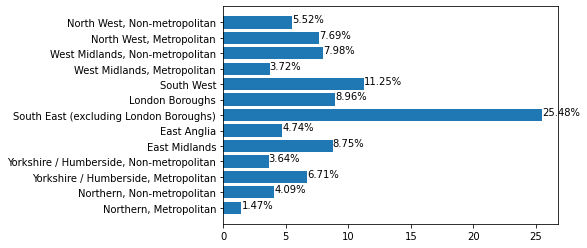

In [46]:
#Metropolitan area
x = ['Northern, Metropolitan',
'Northern, Non-metropolitan',
'Yorkshire / Humberside, Metropolitan',
'Yorkshire / Humberside, Non-metropolitan',
'East Midlands',
'East Anglia',
'South East (excluding London Boroughs)',
'London Boroughs',
'South West',
'West Midlands, Metropolitan',
'West Midlands, Non-metropolitan',
'North West, Metropolitan',
'North West, Non-metropolitan']
y = round(socio.iloc[:,84:97].sum()/pop*100,2)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

## General Mobility Stats

In [47]:
#Total trips
total_trips = mobility['Total Number of Trips'].sum()
total_trips_weekday = mobility['Count_Weekday_Trips'].sum()

avg_trips_7day = mobility['Total Number of Trips'].mean() 
avg_trips_weekdays  = mobility['Count_Weekday_Trips'].mean()

avg_trips_1day  = mobility['Total Number of Trips'].mean()/7
avg_trips_1day_weekday  = mobility['Count_Weekday_Trips'].mean()/5

print(
    'Total number of trips of all individuals (whole week): ', total_trips,
    '\nTotal number of trips of all individuals (weekdays): ',total_trips_weekday,
    '\nAverage number of trips per person (whole week): ',avg_trips_7day,
    '\nAverage number of trips per person (weekdays): ', avg_trips_weekdays,
    '\nAverage trips per person daily (inc weekends): ',avg_trips_1day,
    '\nAverage trips per person daily (exc weekends): ', avg_trips_1day_weekday
)

Total number of trips of all individuals (whole week):  41839 
Total number of trips of all individuals (weekdays):  31569 
Average number of trips per person (whole week):  17.1120654396728 
Average number of trips per person (weekdays):  12.911656441717792 
Average trips per person daily (inc weekends):  2.4445807770961143 
Average trips per person daily (exc weekends):  2.5823312883435583


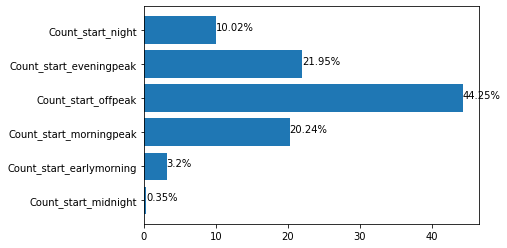

In [56]:
#time of the day stats

#trip start
# # Mid Night         12 am to 4 am

# #Early Morning    4 am to 7 am

# #Morning Peak   7 am to 10 am

# # offpeak day: 10 am to 4 pm

# #Evening Peak    4 pm to 7 pm

# # Night         7 pm to 12 am
x = ['Count_start_midnight','Count_start_earlymorning', 'Count_start_morningpeak',\
     'Count_start_offpeak','Count_start_eveningpeak','Count_start_night']

y = round(mobility.iloc[:,1:7].sum()/total_trips*100,2)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

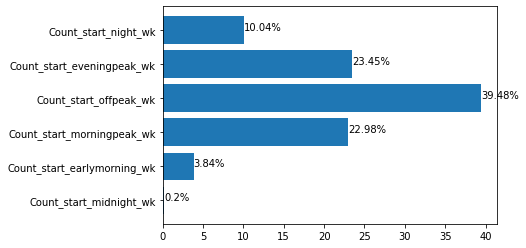

In [67]:
#TRIP START ONLY WEEKDAYS
x = ['Count_start_midnight_wk','Count_start_earlymorning_wk',\
     'Count_start_morningpeak_wk','Count_start_offpeak_wk','Count_start_eveningpeak_wk'\
     ,'Count_start_night_wk']

y = round(mobility.iloc[:,17:23].sum()/total_trips_weekday*100,2)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

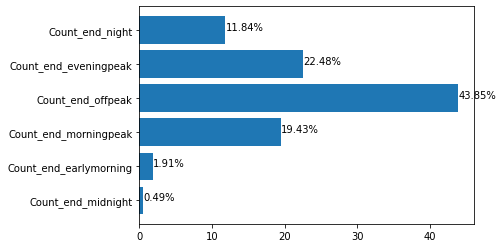

In [76]:
#trip end

x = ['Count_end_midnight','Count_end_earlymorning', 'Count_end_morningpeak',\
     'Count_end_offpeak','Count_end_eveningpeak','Count_end_night']
y = round(mobility.iloc[:,7:13].sum()/total_trips*100,2)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

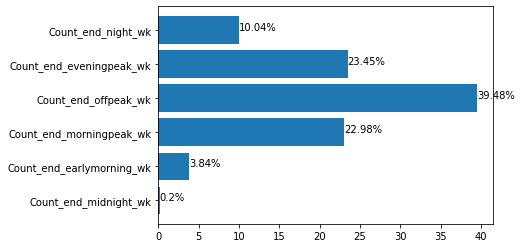

In [77]:
#trip end weekdayss

x = ['Count_end_midnight_wk','Count_end_earlymorning_wk', 'Count_end_morningpeak_wk',\
     'Count_end_offpeak_wk','Count_end_eveningpeak_wk','Count_end_night_wk']
y = round(mobility.iloc[:,17:23].sum()/total_trips_weekday*100,2)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

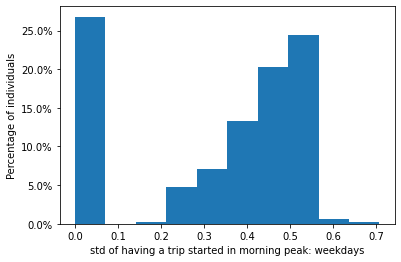

In [78]:
# trip start
#std of having a trip in the morning:  week days
plt.hist(mobility['std_start_morningpeak_wk'],weights=\
         np.ones(len(mobility['std_start_morningpeak_wk']))\
         / len(mobility['std_start_morningpeak_wk']),bins=10)

plt.xlabel('std of having a trip started in morning peak: weekdays')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



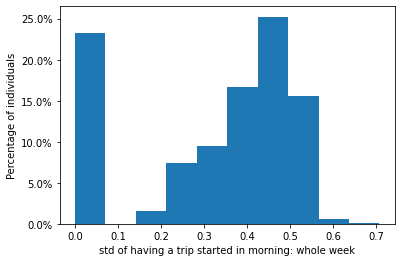

In [79]:
#std of having a trip in the morning:  week days
plt.hist(mobility['std_start_morningpeak'],weights=\
         np.ones(len(mobility['std_start_morningpeak']))\
         / len(mobility['std_start_morningpeak']),bins=10)

plt.xlabel('std of having a trip started in morning: whole week')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

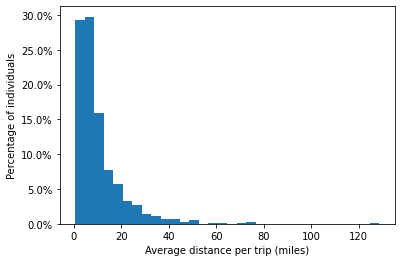

In [ ]:
# distance 
#average per trip per individual
plt.hist(mobility['avg_Distance'], weights=np.ones(len(mobility['avg_Distance']))\
         / len(mobility['avg_Distance']),bins=32)
#each bin: 2 miles
#including short walks, excluding will yeild similar histogram
plt.xlabel('Average distance per trip (miles)')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


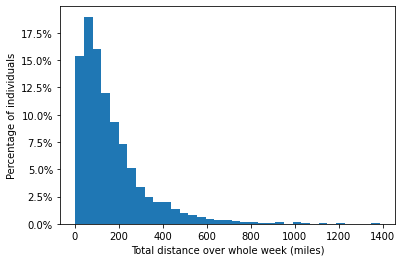

In [ ]:
# distance 
#total per individual
plt.hist(mobility['Total_Distance'], weights=np.ones(len(mobility['Total_Distance']))\
         / len(mobility['Total_Distance']),bins=35)
#each bin: 40 miles
#including short walks, excluding will yeild similar histogram
plt.xlabel('Total distance over whole week (miles)')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()




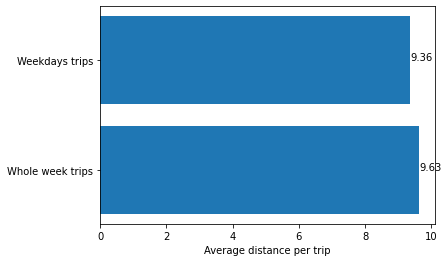

In [ ]:
# distance 
#weekend vs weekday
x = ['Whole week trips','Weekdays trips']

y = [round(mobility['Total_Distance'].sum()/total_trips,2),round(mobility['Total_Distance_wk'].sum()/total_trips_weekday,2)]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.xlabel('Average distance per trip')

plt.show()


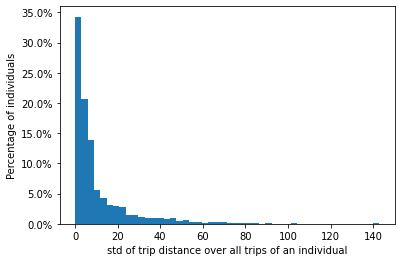

Average std of the distance travelled by an individual is:  10.640919274808372


In [ ]:
#std of  distance: all week
plt.hist(mobility['std_Distance'],weights=np.ones(len(mobility['std_Distance']))\
         / len(mobility['std_Distance']),bins=48)
#each bin: 3 miles
#including short walks, excluding will yeild similar histogram
plt.xlabel('std of trip distance over all trips of an individual')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

print('Average std of the distance travelled by an individual is: ',\
      mobility['std_Distance'].mean())


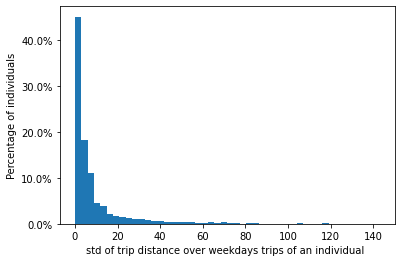

Average std of the distance travelled by an individual is:  8.612328899483849


In [ ]:
#std of  distance: weekdays
plt.hist(mobility['std_Distance_wk'],weights=np.ones(len(mobility['std_Distance_wk']))\
         / len(mobility['std_Distance_wk']),bins=48)
#each bin: 3 miles
#including short walks, excluding will yeild similar histogram
plt.xlabel('std of trip distance over weekdays trips of an individual ')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

print('Average std of the distance travelled by an individual is: ',\
      mobility['std_Distance_wk'].mean())

# std over weekday trips are lower

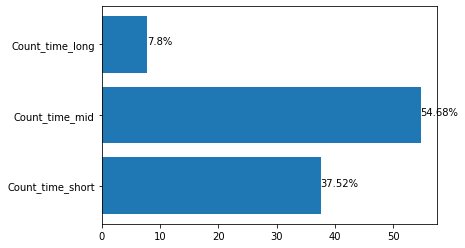

In [ ]:
#trip time
#short: less than 15 min
#mid: 15 min to 1hr
#long: more than 1 hr
x = ['Count_time_short','Count_time_mid', 'Count_time_long']

y = round(mobility[['Count_time_short','Count_time_mid','Count_time_long']].sum()\
          /total_trips*100,2)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

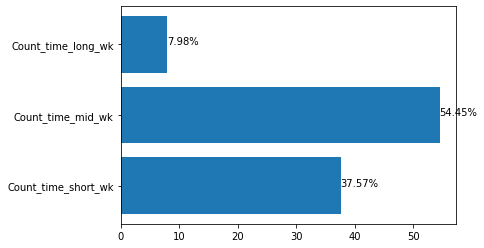

In [ ]:
#trip time: weekdays
#short: less than 15 min
#mid: 15 min to 1hr
#long: more than 1 hr
x = ['Count_time_short_wk','Count_time_mid_wk', 'Count_time_long_wk']

y = round(mobility[['Count_time_short_wk','Count_time_mid_wk','Count_time_long_wk']].sum()\
          /total_trips_weekday*100,2)
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,str(value)+'%')
 
plt.show()

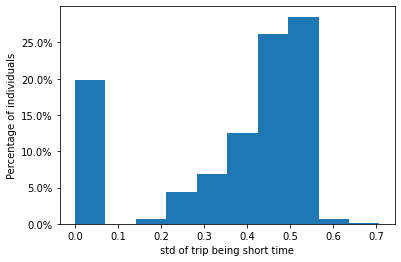

In [ ]:
#std of  short trip time: whole week
plt.hist(mobility['std_travel_short'],weights=np.ones(len(mobility['std_travel_short']))\
         / len(mobility['std_travel_short']),bins=10)

plt.xlabel('std of trip being short time')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



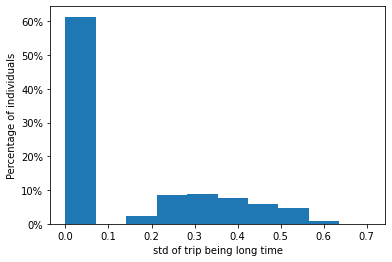

In [ ]:
#std of  long trip time: whole week
plt.hist(mobility['std_travel_long'],weights=np.ones(len(mobility['std_travel_long']))\
         / len(mobility['std_travel_long']),bins=10)

plt.xlabel('std of trip being long time')
plt.ylabel('Percentage of individuals')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()




In [80]:
mobility.columns

Index(['Count_Weekday_Trips', 'Count_start_midnight',
       'Count_start_earlymorning', 'Count_start_morningpeak',
       'Count_start_offpeak', 'Count_start_eveningpeak', 'Count_start_night',
       'Count_end_midnight', 'Count_end_earlymorning', 'Count_end_morningpeak',
       ...
       'std_Distance_ex_wk', 'std_time_short_wk', 'std_time_mid_wk',
       'std_time_long_wk', 'std_travel_short_wk', 'std_travel_mid_wk',
       'std_travel_long_wk', 'std_max_speed_wk', 'std_min_speed_wk',
       'Total Number of Trips'],
      dtype='object', length=123)